In [1]:
import numpy as np

# Define the mean and standard deviation for each variable
mean_hr = 68
std_hr = 10
mean_rr = 12
std_rr = 3
mean_ptt = 0.055
std_ptt = 0.01
mean_sbp = 98
std_sbp = 10
mean_dbp = 69
std_dbp = 5

# Define the correlation coefficients between variables
corr_hr_ptt = -0.5
corr_hr_sbp = 0.3
corr_hr_dbp = 0.1
corr_ptt_sbp = -0.8
corr_ptt_dbp = 0.5
corr_rr_hr = -0.2
corr_rr_ptt = 0.1
corr_rr_sbp = 0.05
corr_rr_dbp = 0.1

# Define the covariance matrix
cov_matrix = np.array([[std_hr**2, corr_hr_ptt*std_hr*std_ptt, corr_hr_sbp*std_hr*std_sbp, corr_hr_dbp*std_hr*std_dbp, corr_rr_hr*std_hr*std_rr],
                      [corr_hr_ptt*std_hr*std_ptt, std_ptt**2, corr_ptt_sbp*std_ptt*std_sbp, corr_ptt_dbp*std_ptt*std_dbp, corr_rr_ptt*std_ptt*std_rr],
                      [corr_hr_sbp*std_hr*std_sbp, corr_ptt_sbp*std_ptt*std_sbp, std_sbp**2, 0, corr_rr_sbp*std_sbp*std_rr],
                      [corr_hr_dbp*std_hr*std_dbp, corr_ptt_dbp*std_ptt*std_dbp, 0, std_dbp**2, corr_rr_dbp*std_dbp*std_rr],
                      [corr_rr_hr*std_hr*std_rr, corr_rr_ptt*std_ptt*std_rr, corr_rr_sbp*std_sbp*std_rr, corr_rr_dbp*std_dbp*std_rr, std_rr**2]])

# Generate a sample of 1000 observations from the multivariate normal distribution
sample = np.random.multivariate_normal([mean_hr, mean_ptt, mean_sbp, mean_dbp, mean_rr], cov_matrix, size=1000)

# Ensure that all values are positive
sample = np.abs(sample)

# Round the values to two decimal places
sample = np.round(sample, decimals=2)

# Define the header for the CSV file
header = "Heart rate (bpm),Pulse transit time (ms),Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Respiration rate (breaths per minute)"

# Save the sample as a CSV file
np.savetxt("sample_data.csv", sample, delimiter=",", header=header, comments="")

# Print the first five rows of the dataset
print(sample[:5])


[[5.7370e+01 6.0000e-02 9.0620e+01 6.1580e+01 1.0580e+01]
 [5.2690e+01 5.0000e-02 1.0453e+02 6.6610e+01 1.3710e+01]
 [7.0340e+01 5.0000e-02 9.6890e+01 6.6540e+01 1.0780e+01]
 [5.9920e+01 7.0000e-02 8.4740e+01 7.0640e+01 1.2050e+01]
 [7.9480e+01 5.0000e-02 9.8780e+01 7.0980e+01 1.3190e+01]]


## SBP and PTT 

Slope: -731.7169254070427
Intercept: 138.30344074214315


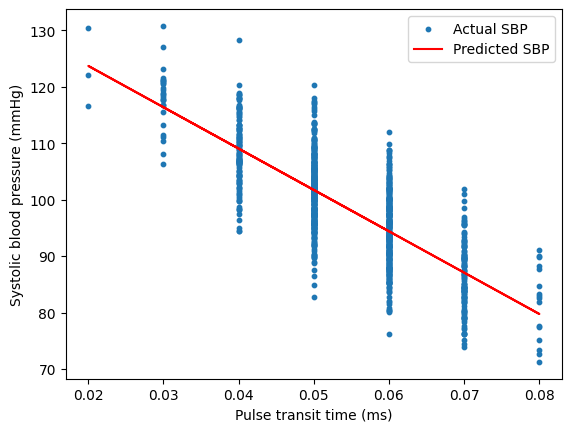

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sample data from the CSV file
data = np.loadtxt('sample_data.csv', delimiter=',', skiprows=1)

# Extract the PTT and SBP columns from the data
ptt = data[:, 1]
sbp = data[:, 2]

# Define the least squares linear regression function
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sum((x - x_mean) ** 2)
    slope = num / den
    intercept = y_mean - slope * x_mean
    return slope, intercept

# Compute the linear regression between PTT and SBP using least squares
slope, intercept = least_squares(ptt, sbp)

# Print the slope and intercept of the regression line
print('Slope:', slope)
print('Intercept:', intercept)

# Compute the predicted SBP values using the regression line
sbp_pred = slope * ptt + intercept

# Plot the actual and predicted SBP values against PTT
plt.scatter(ptt, sbp, s=10, label='Actual SBP')
plt.plot(ptt, sbp_pred, c='r', label='Predicted SBP')
plt.xlabel('Pulse transit time (ms)')
plt.ylabel('Systolic blood pressure (mmHg)')
plt.legend()
plt.show()


In [3]:
# Calculate R-squared
ss_tot = np.sum((sbp - np.mean(sbp)) ** 2)
ss_res = np.sum((sbp - sbp_pred) ** 2)
r2 = 1 - ss_res / ss_tot
print('R-squared:', r2)

# Calculate MSE and RMSE
mse = np.mean((sbp - sbp_pred) ** 2)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: 0.5955302747981226
MSE: 38.41464018933737
RMSE: 6.197954516559263


## SBP and PTT

Slope for HR: 0.26358117216459026
Intercept for HR: 80.55554508422374


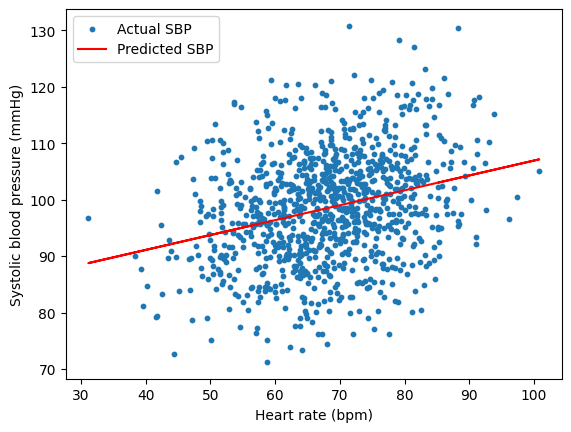

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sample data from the CSV file
data = np.loadtxt('sample_data.csv', delimiter=',', skiprows=1)

# Extract the HR and SBP columns from the data
hr = data[:, 0]
sbp = data[:, 2]

# Define the least squares linear regression function
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sum((x - x_mean) ** 2)
    slope = num / den
    intercept = y_mean - slope * x_mean
    return slope, intercept

# Compute the linear regression between HR and SBP using least squares
slope_hr, intercept_hr = least_squares(hr, sbp)

# Compute the predicted SBP values using the regression line
sbp_pred = slope_hr * hr + intercept_hr

# Print the slope and intercept of the regression line
print('Slope for HR:', slope_hr)
print('Intercept for HR:', intercept_hr)

# Plot the actual and predicted SBP values against HR
plt.scatter(hr, sbp, s=10, label='Actual SBP')
plt.plot(hr, sbp_pred, c='r', label='Predicted SBP')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Systolic blood pressure (mmHg)')
plt.legend()
plt.show()


In [5]:
# Calculate R-squared
ss_tot = np.sum((sbp - np.mean(hr)) ** 2)
ss_res = np.sum((sbp - sbp_pred) ** 2)
r2 = 1 - ss_res / ss_tot
print('R-squared:', r2)

# Calculate MSE and RMSE
mse = np.mean((sbp - sbp_pred) ** 2)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: 0.9142873182268993
MSE: 87.48863441063806
RMSE: 9.353535930900039


## DBP and PTT

Slope: 221.95963650132526
Intercept: 56.815255774327916


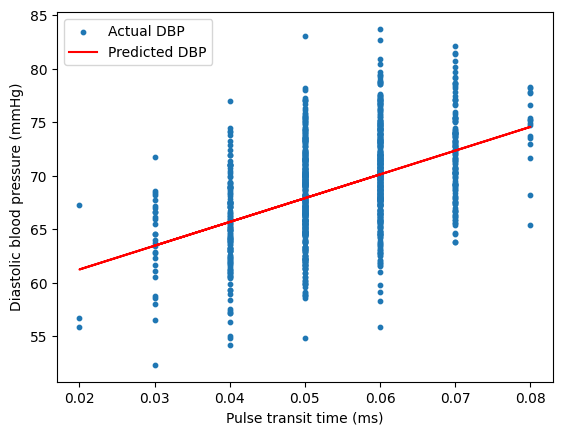

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sample data from the CSV file
data = np.loadtxt('sample_data.csv', delimiter=',', skiprows=1)

# Extract the PTT and SBP columns from the data
ptt = data[:, 1]
dbp = data[:, 3]

# Define the least squares linear regression function
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sum((x - x_mean) ** 2)
    slope = num / den
    intercept = y_mean - slope * x_mean
    return slope, intercept

# Compute the linear regression between PTT and DBP using least squares
slope, intercept = least_squares(ptt, dbp)

# Print the slope and intercept of the regression line
print('Slope:', slope)
print('Intercept:', intercept)

# Compute the predicted SBP values using the regression line
dbp_pred = slope * ptt + intercept

# Plot the actual and predicted SBP values against PTT
plt.scatter(ptt, dbp, s=10, label='Actual DBP')
plt.plot(ptt, dbp_pred, c='r', label='Predicted DBP')
plt.xlabel('Pulse transit time (ms)')
plt.ylabel('Diastolic blood pressure (mmHg)')
plt.legend()
plt.show()


## HR and PTT to SBP

Slope for PTT: -731.7169254070427
Intercept for PTT: 138.30344074214315
Slope for HR: 0.26358117216459026
Intercept for HR: 80.55554508422374


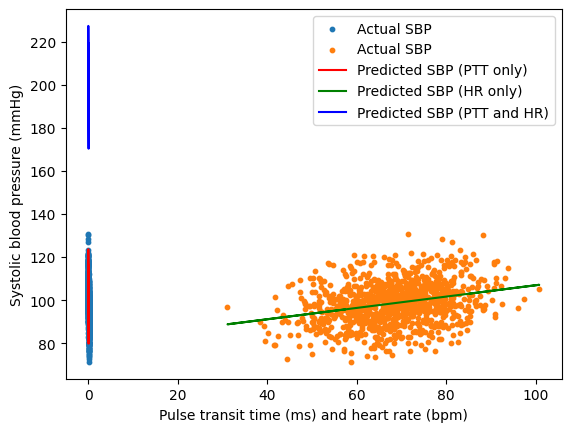

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sample data from the CSV file
data = np.loadtxt('sample_data.csv', delimiter=',', skiprows=1)

# Extract the HR, PTT, and SBP columns from the data
hr = data[:, 0]
ptt = data[:, 1]
sbp = data[:, 2]

# Define the least squares linear regression function
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sum((x - x_mean) ** 2)
    slope = num / den
    intercept = y_mean - slope * x_mean
    return slope, intercept

# Compute the linear regression between PTT and SBP using least squares
slope_ptt, intercept_ptt = least_squares(ptt, sbp)

# Compute the linear regression between HR and SBP using least squares
slope_hr, intercept_hr = least_squares(hr, sbp)

# Compute the predicted SBP values using the regression lines
sbp_pred = slope_ptt * ptt + intercept_ptt + slope_hr * hr + intercept_hr

# Print the slopes and intercepts of the regression lines
print('Slope for PTT:', slope_ptt)
print('Intercept for PTT:', intercept_ptt)
print('Slope for HR:', slope_hr)
print('Intercept for HR:', intercept_hr)

# Plot the actual and predicted SBP values against PTT and HR
plt.scatter(ptt, sbp, s=10, label='Actual SBP')
plt.scatter(hr, sbp, s=10, label='Actual SBP')
plt.plot(ptt, slope_ptt * ptt + intercept_ptt, c='r', label='Predicted SBP (PTT only)')
plt.plot(hr, slope_hr * hr + intercept_hr, c='g', label='Predicted SBP (HR only)')
plt.plot(ptt, sbp_pred, c='b', label='Predicted SBP (PTT and HR)')
plt.xlabel('Pulse transit time (ms) and heart rate (bpm)')
plt.ylabel('Systolic blood pressure (mmHg)')
plt.legend()
plt.show()


Slope for PTT: -0.000784772732533561
Intercept for PTT: 98.49388636234225
Slope for HR: 0.2883682365699866
Intercept for HR: 100.38901399268069


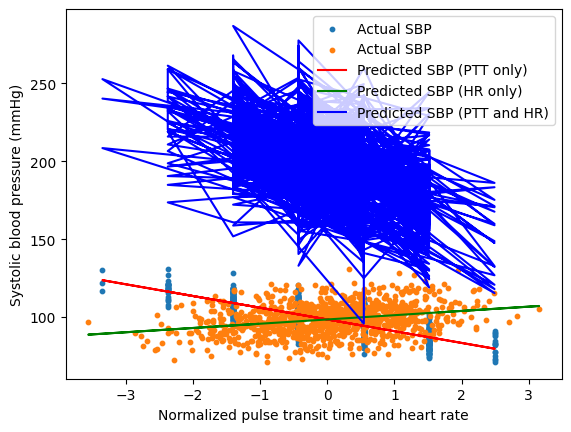

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sample data from the CSV file
data = np.loadtxt('sample_data.csv', delimiter=',', skiprows=1)

# Extract the HR, PTT, and SBP columns from the data
hr = data[:, 0]
ptt = data[:, 1]
sbp = data[:, 2]

# Normalize the PTT and HR values
ptt_mean = np.mean(ptt)
ptt_std = np.std(ptt)
hr_mean = np.mean(hr)
hr_std = np.std(hr)
ptt_norm = (ptt - ptt_mean) / ptt_std
hr_norm = (hr - hr_mean) / hr_std

# Define the least squares linear regression function
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sum((x - x_mean) ** 2)
    slope = num / den
    intercept = y_mean - slope * x_mean
    return slope, intercept

# Compute the linear regression between PTT and SBP using least squares
slope_ptt, intercept_ptt = least_squares(ptt_norm, sbp)

# Compute the linear regression between HR and SBP using least squares
slope_hr, intercept_hr = least_squares(hr_norm, sbp)

# Compute the predicted SBP values using the regression lines
sbp_pred = slope_ptt * ptt_norm * ptt_std + intercept_ptt + slope_hr * hr_norm * hr_std + intercept_hr

# Print the slopes and intercepts of the regression lines
print('Slope for PTT:', slope_ptt * ptt_std / sbp.mean())
print('Intercept for PTT:', intercept_ptt + slope_ptt * ptt_mean / sbp.mean())
print('Slope for HR:', slope_hr * hr_std / sbp.mean())
print('Intercept for HR:', intercept_hr + slope_hr * hr_mean / sbp.mean())

# Plot the actual and predicted SBP values against PTT and HR
plt.scatter(ptt_norm, sbp, s=10, label='Actual SBP')
plt.scatter(hr_norm, sbp, s=10, label='Actual SBP')
plt.plot(ptt_norm, slope_ptt * ptt_norm + intercept_ptt, c='r', label='Predicted SBP (PTT only)')
plt.plot(hr_norm, slope_hr * hr_norm + intercept_hr, c='g', label='Predicted SBP (HR only)')
plt.plot(ptt_norm, sbp_pred, c='b', label='Predicted SBP (PTT and HR)')
plt.xlabel('Normalized pulse transit time and heart rate')
plt.ylabel('Systolic blood pressure (mmHg)')
plt.legend()
plt.show()


In [9]:
y_mean = np.mean(sbp)
y_pred_mean = np.mean(sbp_pred)
ss_tot = np.sum((sbp - y_mean) ** 2)
ss_res = np.sum((sbp - sbp_pred) ** 2)
r_squared = 1 - ss_res / ss_tot
mse = ss_res / len(sbp)
rmse = np.sqrt(mse)
print('R-squared:', r_squared)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -109.02018698213865
MSE: 10449.202086442978
RMSE: 102.22133870402489


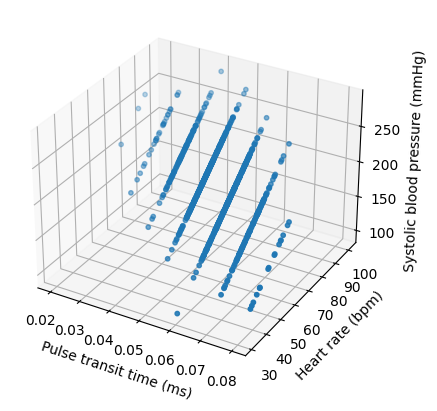

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of the predicted SBP values against PTT and HR
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ptt, hr, sbp_pred, s=10, label='Predicted SBP')
ax.set_xlabel('Pulse transit time (ms)')
ax.set_ylabel('Heart rate (bpm)')
ax.set_zlabel('Systolic blood pressure (mmHg)')
plt.show()

In [11]:
# Calculate the R-squared
ss_tot = np.sum((sbp - np.mean(sbp)) ** 2)
ss_res = np.sum((sbp - sbp_pred) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared:', r_squared)

# Calculate the MSE
mse = np.mean((sbp - sbp_pred) ** 2)
print('MSE:', mse)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)


R-squared: -109.02018698213865
MSE: 10449.202086442978
RMSE: 102.22133870402489


## 10 fold cross validation

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the number of folds for cross-validation
num_folds = 10

# Create a KFold object to split the data into folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
r2_scores = []
mse_scores = []
rmse_scores = []

# Loop over the folds
for train_index, test_index in kf.split(data):
    # Split the data into training and test sets for the current fold
    train_data = data[train_index]
    test_data = data[test_index]
    
    # Extract the features and target variables for training and test sets
    train_hr = train_data[:, 0]
    train_ptt = train_data[:, 1]
    train_sbp = train_data[:, 2]
    test_hr = test_data[:, 0]
    test_ptt = test_data[:, 1]
    test_sbp = test_data[:, 2]
    
    # Compute the linear regression models for training data
    slope_ptt, intercept_ptt = least_squares(train_ptt, train_sbp)
    slope_hr, intercept_hr = least_squares(train_hr, train_sbp)
    
    # Compute the predicted SBP values using the regression lines for test data
    sbp_pred = slope_ptt * test_ptt + intercept_ptt + slope_hr * test_hr + intercept_hr
    
    # Evaluate the model using R-squared, mean squared error, and root mean squared error
    r2 = r2_score(test_sbp, sbp_pred)
    mse = mean_squared_error(test_sbp, sbp_pred)
    rmse = np.sqrt(mse)
    
    # Append the evaluation metrics for the current fold to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Compute the mean and standard deviation of the evaluation metrics across all folds
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Print the mean and standard deviation of the evaluation metrics
print('R-squared: {:.3f} ± {:.3f}'.format(mean_r2, std_r2))
print('MSE: {:.3f} ± {:.3f}'.format(mean_mse, std_mse))
print('RMSE: {:.3f} ± {:.3f}'.format(mean_rmse, std_rmse))


R-squared: -104.512 ± 13.382
MSE: 9753.906 ± 96.065
RMSE: 98.761 ± 0.487


## Training a Linear regression model


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the sample data from the CSV file
sample_data = np.loadtxt("sample_data.csv", delimiter=",", skiprows=1)

# Extract the relevant columns for the linear regression
X = sample_data[:, :2] # Features: HR and PTT
y = sample_data[:, 2:4] # Targets: SBP and DBP

# Train a linear regression model using least squares
model = LinearRegression().fit(X, y)

# Print the intercept and coefficients
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)


Intercept:  [150.57715254  38.12983463]
Coefficients:  [[-1.28650210e-01 -7.96353616e+02]
 [ 1.95856265e-01  3.20362126e+02]]


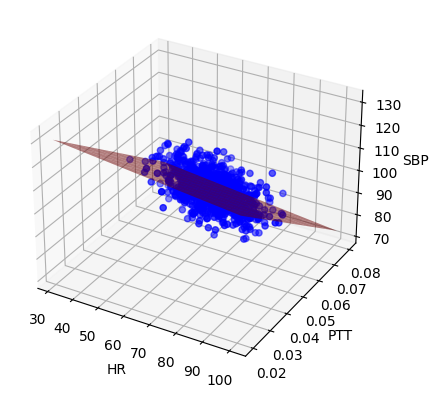

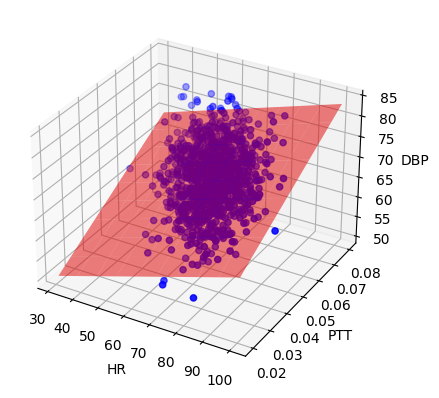

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the sample data from the CSV file
sample_data = np.loadtxt("sample_data.csv", delimiter=",", skiprows=1)

# Extract the relevant columns for the linear regression
X = sample_data[:, :2] # Features: HR and PTT
y = sample_data[:, 2:4] # Targets: SBP and DBP

# Train a linear regression model using least squares
model = LinearRegression().fit(X, y)

# Plot the 3D scatter plot of the data points and the linear regression plane for SBP
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y[:, 0], c='b', marker='o')
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 10))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
zz = zz.reshape(xx.shape)
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5)
ax.set_xlabel('HR')
ax.set_ylabel('PTT')
ax.set_zlabel('SBP')
plt.show()

# Plot the 3D scatter plot of the data points and the linear regression plane for DBP
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y[:, 1], c='b', marker='o')
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 10))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]
zz = zz.reshape(xx.shape)
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5)
ax.set_xlabel('HR')
ax.set_ylabel('PTT')
ax.set_zlabel('DBP')
plt.show()


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the sample data
data = np.loadtxt("sample_data.csv", delimiter=",", skiprows=1)

# Split the data into input (X) and output (y) variables
X = data[:, [1, 0]]  # ptt and hr
y = data[:, [2, 3]]  # sbp and dbp

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Use the model to predict sbp and dbp for the first five samples
X_test = X[:5]
y_pred = model.predict(X_test)

# Calculate the RMSE for sbp and dbp
y_true = y[:5]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("RMSE:", rmse)


RMSE: 3.394604256989008


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the sample data
data = np.loadtxt("sample_data.csv", delimiter=",", skiprows=1)

# Split the data into input (X) and output (y) variables
X = data[:, [1, 0]]  # ptt and hr
y = data[:, [2, 3]]  # sbp and dbp

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Use the model to predict sbp and dbp for the first five samples
X_test = X[:5]
y_pred = model.predict(X_test)

# Calculate the RMSE, MSE, and R-squared for sbp and dbp
y_true = y[:5]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MSE: 11.523338061567895
RMSE: 3.394604256989008
R-squared: 0.3687519506813449
